<a href="https://colab.research.google.com/github/shriramg44/Partition_hopping/blob/main/Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

#!pip install ta
import mplfinance as mpl
import ta

In [58]:
data=pd.read_csv("https://raw.githubusercontent.com/shriramg44/Partition_hopping/main/data.csv",index_col=0,parse_dates=True)
data.index.name = 'Date'
df = pd.DataFrame(data[:72])
#df = pd.DataFrame(data[:20])
#ha = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
#ha = ha[['ha_open', 'ha_high', 'ha_low', 'ha_close']]
#print(df)
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#df.index = pd.DatetimeIndex(df['Date'])
#mpl.plot(df, type='candle')

               Open    High     Low     Close
Date                                         
2000-01-03      NaN  170.00  166.00  168.0000
2000-01-04  168.000  183.45  171.00  177.5625
2000-01-05  177.900  173.90  165.00  168.9625
2000-01-06  168.475  170.00  165.30  167.9000
2000-01-07  168.150  171.00  162.15  165.9125
...             ...     ...     ...       ...
2000-04-10  201.475  224.60  219.95  223.4125
2000-04-11  224.550  234.90  209.00  223.6750
2000-04-12  225.400  243.00  223.00  234.2500
2000-04-13  235.500  234.00  215.00  227.3625
2000-04-17  230.225  225.00  212.95  218.9750

[72 rows x 4 columns]


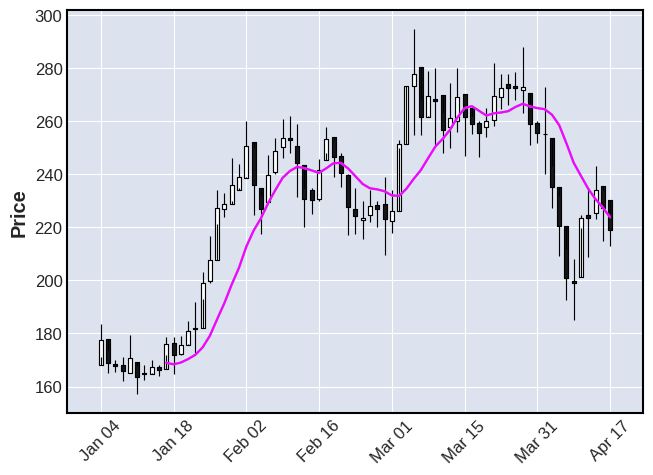

In [59]:
def heiken_ashi(df):
    """
    Calculates Heikin-Ashi candles for a given Pandas DataFrame.
    Assumes the input DataFrame has columns named 'Open', 'High', 'Low', and 'Close'.
    Returns a new DataFrame with Heikin-Ashi candles.
    """
    ha_open = (df['Open'].shift(1) + df['Close'].shift(1)) / 2
    ha_close = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
    ha_high = df[['High', 'Open', 'Close']].max(axis=1)
    ha_low = df[['Low', 'Open', 'Close']].min(axis=1)
    
    ha_df = pd.DataFrame({
        'Open': ha_open,
        'High': ha_high,
        'Low': ha_low,
        'Close': ha_close
    })
    
    return ha_df

ha_df = heiken_ashi(df)
print(ha_df)
mpl.plot(ha_df[1:], type='candle', mav =(10,10))
# Plot the Heikin-Ashi candles
#fig, ax = plt.subplots()
#ax.set_title('Heikin-Ashi Candles')
#ax.plot(df.index, ha_df['Open'], label='HA Open')
#ax.plot(df.index, ha_df['Close'], label='HA Close')
#ax.plot(df.index, ha_df['High'], label='HA High')
#ax.plot(df.index, ha_df['Low'], label='HA Low')
#ax.legend()
#plt.show()